# Data Preprocessing (PyTorch)

This notebook replaces the original data_preprocessing.py. Add your preprocessing code here.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from pathlib import Path
import cv2
from collections import Counter
import pandas as pd
import shutil
import random

# print("PyTorch version:", torch.__version__)
# print("CUDA available:", torch.cuda.is_available())
# print("GPU name:", torch.cuda.get_device_name(0))

In [2]:
data = np.load('C:/Users/ycode/Desktop/Diagnostic-multimodal-par-IA-via-Transfer-Learning/Medical-Image-Analysis-AI/variables/data_set.npz',allow_pickle=True)


In [3]:
print(data['labels'])
print(data['images'])



['Benign' 'Benign' 'Benign' ... 'Pro-B' 'Pro-B' 'Pro-B']
[array([[[253, 234, 243],
         [255, 239, 248],
         [255, 238, 247],
         ...,
         [254, 240, 252],
         [255, 245, 253],
         [254, 244, 250]],

        [[250, 231, 240],
         [254, 237, 246],
         [254, 239, 247],
         ...,
         [255, 240, 254],
         [255, 241, 252],
         [253, 242, 250]],

        [[252, 236, 243],
         [255, 239, 246],
         [255, 243, 249],
         ...,
         [255, 238, 255],
         [255, 241, 253],
         [255, 241, 252]],

        ...,

        [[225,  80, 119],
         [222,  74, 114],
         [222,  67, 111],
         ...,
         [251, 234, 238],
         [252, 235, 239],
         [252, 235, 239]],

        [[223,  86, 118],
         [221,  82, 116],
         [222,  74, 116],
         ...,
         [252, 235, 239],
         [253, 232, 240],
         [255, 233, 241]],

        [[230,  99, 126],
         [226,  89, 121],
         [228,  8

Nombre d’échantillons par classe :
Benign: 512
early Pre-B: 979
Pre-B: 955
Pro-B: 796


C:\Users\ycode\AppData\Local\Temp\ipykernel_22304\2031996802.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['labels'], palette="Set2")


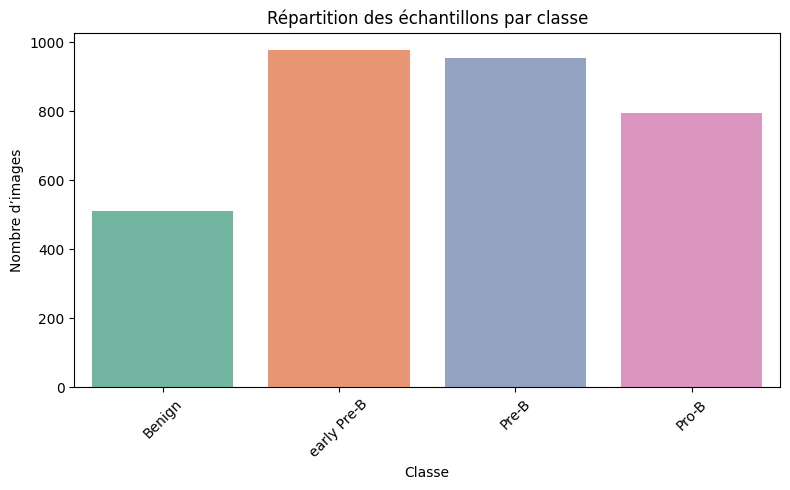

In [4]:
class_counts = Counter(data['labels'])

print("Nombre d’échantillons par classe :")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

plt.figure(figsize=(8, 5))
sns.countplot(x=data['labels'], palette="Set2")

plt.title("Répartition des échantillons par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d’images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

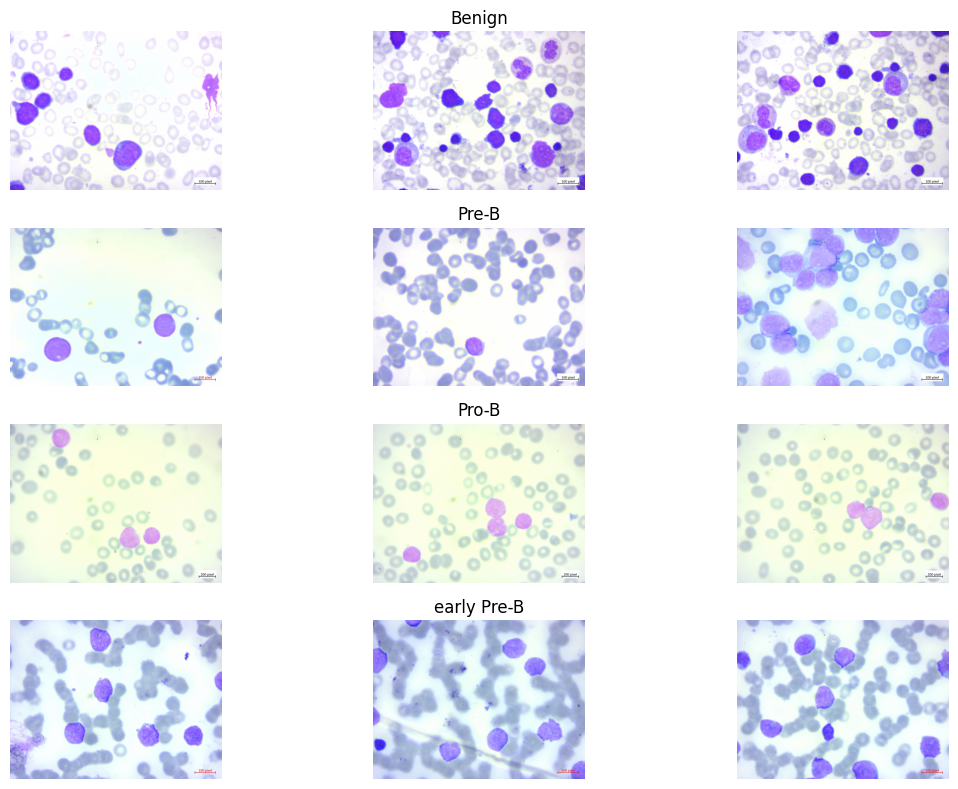

In [5]:
n_images_per_class = 3

classes = sorted(set(data['labels']))

plt.figure(figsize=(12, len(classes) * 2))

for i, cls in enumerate(classes):
    idxs = [j for j, lbl in enumerate(data['labels']) if lbl == cls]
    
    sample_idxs = idxs[:n_images_per_class]
    
    for j, idx in enumerate(sample_idxs):
        img = cv2.cvtColor(data['images'][idx], cv2.COLOR_BGR2RGB) 
        plt.subplot(len(classes), n_images_per_class, i * n_images_per_class + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 1:
            plt.title(cls)
            
plt.tight_layout()
plt.show()

array('C:/Users/ycode/Desktop/Blood_Cells_Cancer/Blood cell Cancer [ALL]',
      dtype='<U65')

In [ ]:


# Dossier source (celui que tu as déjà utilisé)
data_dir = Path('C:/Users/ycode/Desktop/Blood_Cells_Cancer/Blood cell Cancer [ALL]')

# Dossiers de sortie
base_output = Path("C:/Users/ycode/Desktop/Diagnostic-multimodal-par-IA-via-Transfer-Learning/Medical-Image-Analysis-AI/data/part_one_data")
train_dir = base_output / "train"
val_dir   = base_output / "val"
test_dir  = base_output / "test"

# Créer les dossiers de sortie s’ils n’existent pas
for d in [train_dir, val_dir, test_dir]:
    d.mkdir(parents=True, exist_ok=True)

# Ratios de séparation
train_ratio = 0.7
val_ratio   = 0.15
test_ratio  = 0.15

# Fixer une graine pour reproductibilité
random.seed(42)

# Parcourir les classes (chaque dossier du dataset)
for class_name in os.listdir(data_dir):
    class_path = data_dir / class_name
    if not class_path.is_dir():
        continue

    # Créer les sous-dossiers pour chaque ensemble
    for split_dir in [train_dir, val_dir, test_dir]:
        (split_dir / class_name).mkdir(parents=True, exist_ok=True)

    # Lister et mélanger les fichiers d'une classe
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    random.shuffle(images)

    # Calculer les indices de coupure
    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)

    # Diviser les fichiers
    train_files = images[:n_train]
    val_files   = images[n_train:n_train + n_val]
    test_files  = images[n_train + n_val:]

    # Copier les fichiers dans les bons dossiers
    for f in train_files:
        shutil.copy(class_path / f, train_dir / class_name / f)
    for f in val_files:
        shutil.copy(class_path / f, val_dir / class_name / f)
    for f in test_files:
        shutil.copy(class_path / f, test_dir / class_name / f)

    print(f"✅ {class_name}: {n_train} train, {n_val} val, {len(test_files)} test")

print("\n📁 Division terminée avec succès !")


✅ Benign: 358 train, 76 val, 78 test
✅ early Pre-B: 685 train, 146 val, 148 test
✅ Pre-B: 668 train, 143 val, 144 test
✅ Pro-B: 557 train, 119 val, 120 test

📁 Division terminée avec succès !


In [16]:
def count_images(directory):
    counts = {}
    for class_dir in directory.iterdir():
        if class_dir.is_dir():
            counts[class_dir.name] = len(list(class_dir.glob("*.*")))
    return counts

train_counts = count_images(train_dir)
val_counts   = count_images(val_dir)
test_counts  = count_images(test_dir)

print("📊 Nombre d’images par ensemble :\n")
print("Train :", train_counts)
print("Validation :", val_counts)
print("Test :", test_counts)

# print("\n📈 Totaux globaux :")
# print("Train total:", sum(train_counts.values()))
# print("Validation total:", sum(val_counts.values()))
# print("Test total:", sum(test_counts.values()))


📊 Nombre d’images par ensemble :

Train : {'Benign': 358, 'early Pre-B': 685, 'Pre-B': 668, 'Pro-B': 557}
Validation : {'Benign': 76, 'early Pre-B': 146, 'Pre-B': 143, 'Pro-B': 119}
Test : {'Benign': 78, 'early Pre-B': 148, 'Pre-B': 144, 'Pro-B': 120}


In [17]:
np.savez(
    'C:/Users/ycode/Desktop/Diagnostic-multimodal-par-IA-via-Transfer-Learning/Medical-Image-Analysis-AI/variables/split_dirs.npz'
    ,train_dir=train_dir,val_dir=val_dir,test_dir=test_dir)